<a href="https://colab.research.google.com/github/Noodle96/Topicos_Computacion_Grafica/blob/main/Morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [148]:
import numpy as np

# DEFINICION DE LOS FILTROS
#Definicion de kernel cruz
kernelCruz = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
    ], dtype=np.uint8)

# Define the 5x5 diamond-shaped kernel
kernel_diamante5 = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
], dtype=np.uint8)

# Definicion the 7x7 diamond-shaped kernel
kernel_diamante7 = np.array([
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
], dtype=np.uint8)

#Definicion del kernel vertical
kernel_linea_vertical = np.array([
        [1],
        [1],
        [1],
        [1],
        [1]
], dtype=np.uint8)

#Definicion del kernel horizontal
kernel_linea_horizontal = np.array([
    [1, 0, 1]
],dtype=np.uint8)


In [149]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def mostrar_imagen(imagen):
  cv2_imshow(imagen)
  cv2.waitKey(0)

def convert_to_black_and_white(color_image_path):
    # Read the color image
    image = cv2.imread(color_image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply thresholding to convert to black and white
    thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]
    return thresh

def DilatacionCruz(image_path):
    black_and_white_image = convert_to_black_and_white(image_path)
    dilated_image = np.ones_like(black_and_white_image)
    #print(dilated_image)
    for row in range(black_and_white_image.shape[0] - kernelCruz.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernelCruz.shape[1] + 1):
            neighborhood = black_and_white_image[row:row + kernelCruz.shape[0], col:col + kernelCruz.shape[1]]
            center_row, center_col = 1, 1 # centro del kernel cruz
            if neighborhood[center_row, center_col] == 255 and kernelCruz[center_row, center_col] == 1:
                dilated_image[row:row + kernelCruz.shape[0], col:col + kernelCruz.shape[1]] = neighborhood
    return dilated_image

def DilatacionDiamante5(image_path):
    black_and_white_image = convert_to_black_and_white(image_path)
    dilated_image = np.ones_like(black_and_white_image)
    for row in range(black_and_white_image.shape[0] - kernel_diamante5.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernel_diamante5.shape[1] + 1):
            neighborhood = black_and_white_image[row:row + kernel_diamante5.shape[0], col:col + kernel_diamante5.shape[1]]
            center_row, center_col = 2, 2  # center of a 5x5 kernel
            if neighborhood[center_row, center_col] == 255 and kernel_diamante5[center_row, center_col] == 1:
                dilated_image[row:row + kernel_diamante5.shape[0], col:col + kernel_diamante5.shape[1]] = neighborhood
    return dilated_image

def DilatacionDiamante7(image_path):
    black_and_white_image = convert_to_black_and_white(image_path)
    # Initialize the dilated image
    dilated_image = np.ones_like(black_and_white_image)

    for row in range(black_and_white_image.shape[0] - kernel_diamante7.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernel_diamante7.shape[1] + 1):
            neighborhood = black_and_white_image[row:row + kernel_diamante7.shape[0], col:col + kernel_diamante7.shape[1]]
            center_row, center_col = 3, 3  # center of a 7x7 kernel
            if neighborhood[center_row, center_col] == 255 and kernel_diamante7[center_row, center_col] == 1:
                # If a match is found, copy the entire neighborhood to dilated_image
                dilated_image[row:row + kernel_diamante7.shape[0], col:col + kernel_diamante7.shape[1]] = neighborhood

    return dilated_image

def DilatacionLineaVertical(image_path):
    black_and_white_image = convert_to_black_and_white(image_path)
    dilated_image = np.ones_like(black_and_white_image)
    for row in range(black_and_white_image.shape[0] - kernel_linea_vertical.shape[0] + 1):
        for col in range(black_and_white_image.shape[1]):  # Iterate through all columns
            neighborhood = black_and_white_image[row:row + kernel_linea_vertical.shape[0], col:col + 1]

            center_row = 2  # center of a 5x1 kernel
            if neighborhood[center_row, 0] == 255:  # Check only the center element (index 0)
                dilated_image[row:row + kernel_linea_vertical.shape[0], col] = 255
    return dilated_image

def DilatacionLineaHorizontal(image_path):
    black_and_white_image = convert_to_black_and_white(image_path)
    dilated_image = np.ones_like(black_and_white_image)
    for row in range(black_and_white_image.shape[0] - kernel_linea_horizontal.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernel_linea_horizontal.shape[1] +1 ):
            neighborhood = black_and_white_image[row:row + kernel_linea_horizontal.shape[0], col:col + kernel_linea_horizontal.shape[1]]
            center_col = kernel_linea_horizontal.shape[1] // 2  # Calculate center column based on kernel width
            if neighborhood[0, 1] == 255:  # Check the center element
                dilated_image[row:row + kernel_linea_horizontal.shape[0], col] = 255
    return dilated_image

def ErosionCruz(image_path):
    black_and_white_image = convert_to_black_and_white(image_path)
    erosion_image = np.ones_like(black_and_white_image)
    for row in range(black_and_white_image.shape[0] - kernelCruz.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernelCruz.shape[1] + 1):
            neighborhood = black_and_white_image[row:row + kernelCruz.shape[0], col:col + kernelCruz.shape[1]]
            neighborhood_only_index = np.zeros_like(neighborhood)
            center_row, center_col = 1, 1
            neighborhood_only_index[center_row][center_col] = 255
            bandera = True
            for e in range(neighborhood.shape[0]):
                for j in range(neighborhood.shape[1]):
                    if(kernelCruz[e][j] == 1):
                        if(neighborhood[e][j] != 255):
                            bandera = False
                            break
            if(bandera):
                erosion_image[row:row + kernelCruz.shape[0], col:col + kernelCruz.shape[1]] = neighborhood_only_index
    return erosion_image

def ErosionDiamante5(image_path):
    black_and_white_image = convert_to_black_and_white(image_path)
    erosion_image = np.ones_like(black_and_white_image)
    for row in range(black_and_white_image.shape[0] - kernel_diamante5.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernel_diamante5.shape[1] + 1):
            neighborhood = black_and_white_image[row:row + kernel_diamante5.shape[0], col:col + kernel_diamante5.shape[1]]
            neighborhood_only_index = np.zeros_like(neighborhood)
            center_row, center_col = 2, 2
            neighborhood_only_index[center_row][center_col] = 255
            bandera = True
            secondBandera = True
            for e in range(neighborhood.shape[0]):
                if(secondBandera):
                    for j in range(neighborhood.shape[1]):
                        if(kernel_diamante5[e][j] == 1):
                            if(neighborhood[e][j] != 255):
                                bandera = False
                                seconBandera = False
                                break
                else:
                    break
            if(bandera):
                erosion_image[row:row + kernel_diamante5.shape[0], col:col + kernel_diamante5.shape[1]] = neighborhood_only_index
    return erosion_image

def ErosionDiamante7(image_path):
    black_and_white_image = convert_to_black_and_white(image_path)
    erosion_image = np.ones_like(black_and_white_image)
    for row in range(black_and_white_image.shape[0] - kernel_diamante7.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernel_diamante7.shape[1] + 1):
            neighborhood = black_and_white_image[row:row + kernel_diamante7.shape[0], col:col + kernel_diamante7.shape[1]]
            neighborhood_only_index = np.zeros_like(neighborhood)
            center_row, center_col = 3, 3
            neighborhood_only_index[center_row][center_col] = 255
            bandera = True
            secondBandera = True
            for e in range(neighborhood.shape[0]):
                if(secondBandera):
                    for j in range(neighborhood.shape[1]):
                        if(kernel_diamante7[e][j] == 1):
                            if(neighborhood[e][j] != 255):
                                bandera = False
                                seconBandera = False
                                break
                else:
                    break
            if(bandera):
                erosion_image[row:row + kernel_diamante7.shape[0], col:col + kernel_diamante7.shape[1]] = neighborhood_only_index
    return erosion_image

def ErosionLineaVertical(image_path):
    black_and_white_image = convert_to_black_and_white(image_path)
    erosion_image = np.ones_like(black_and_white_image)
    for row in range(black_and_white_image.shape[0] - kernel_linea_vertical.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernel_linea_vertical.shape[1] + 1):
            neighborhood = black_and_white_image[row:row + kernel_linea_vertical.shape[0], col:col + kernel_linea_vertical.shape[1]]
            neighborhood_only_index = np.zeros_like(neighborhood)
            center_row, center_col = 2, 0
            neighborhood_only_index[center_row][center_col] = 255
            bandera = True
            secondBandera = True
            for e in range(neighborhood.shape[0]):
                if(secondBandera):
                    for j in range(neighborhood.shape[1]):
                        if(kernel_diamante7[e][j] == 1):
                            if(neighborhood[e][j] != 255):
                                bandera = False
                                seconBandera = False
                                break
                else:
                    break
            if(bandera):
                erosion_image[row:row + kernel_linea_vertical.shape[0], col:col + kernel_linea_vertical.shape[1]] = neighborhood_only_index
    return erosion_image

def ErosionLineaHorizontal(image_path):
    black_and_white_image = convert_to_black_and_white(image_path)
    erosion_image = np.ones_like(black_and_white_image)
    for row in range(black_and_white_image.shape[0] - kernel_linea_horizontal.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernel_linea_horizontal.shape[1] + 1):
            neighborhood = black_and_white_image[row:row + kernel_linea_horizontal.shape[0], col:col + kernel_linea_horizontal.shape[1]]
            neighborhood_only_index = np.zeros_like(neighborhood)
            center_row, center_col = 0, 1
            neighborhood_only_index[center_row][center_col] = 255
            bandera = True
            secondBandera = True
            for e in range(neighborhood.shape[0]):
                if(secondBandera):
                    for j in range(neighborhood.shape[1]):
                        if(kernel_diamante7[e][j] == 1):
                            if(neighborhood[e][j] != 255):
                                bandera = False
                                seconBandera = False
                                break
                else:
                    break
            if(bandera):
                erosion_image[row:row + kernel_linea_horizontal.shape[0], col:col + kernel_linea_horizontal.shape[1]] = neighborhood_only_index
    return erosion_image

# Las funciones test son solo pruebas
def test(image_path):
    kernelCruz = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
    ], dtype=np.uint8)
    #black_and_white_image = convert_to_black_and_white(image_path)
    # Initialize the dilated image
    print("test -B")

    #black_and_white_image = np.random.randint(1, 100, size=(5, 5))
    black_and_white_image = np.random.choice([0, 255], size=(5, 5))
    dilated_image = np.zeros_like(black_and_white_image)
    print(black_and_white_image)
    # Iterate over all valid image pixels (without padding)
    for row in range(black_and_white_image.shape[0] - kernelCruz.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernelCruz.shape[1] + 1):
            # Extract the neighborhood around the current pixel
            neighborhood = black_and_white_image[row:row + kernelCruz.shape[0], col:col + kernelCruz.shape[1]]
            print("print neighborhood")
            print(neighborhood)
            # Check if the center element of the neighborhood and the center of the kernel are both foreground (255)
            center_row, center_col = 1, 1  # Assuming center of a 7x7 kernel
            if neighborhood[center_row, center_col] == 255 and kernelCruz[center_row, center_col] == 1:
                # If a match is found, copy the entire neighborhood to dilated_image
                dilated_image[row:row + kernelCruz.shape[0], col:col + kernelCruz.shape[1]] = neighborhood
                print("dilated_image")
                print(dilated_image)

    return dilated_image

def InvertedTest(image_path):
    kernelCruz = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
    ], dtype=np.uint8)
    black_and_white_image = convert_to_black_and_white(image_path)
    dilated_image = np.zeros_like(black_and_white_image)
    for row in range(black_and_white_image.shape[0] - kernelCruz.shape[0] + 1):
        for col in range(black_and_white_image.shape[1] - kernelCruz.shape[1] + 1):
            dilated_image[row,col] = 255 - black_and_white_image[row,col]
    return dilated_image

def isEqualImage(image1, image2):
    isEqual = True
    for e in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            if(image1[e][j] != image2[e][j]):
                isEqual = False
    return isEqual

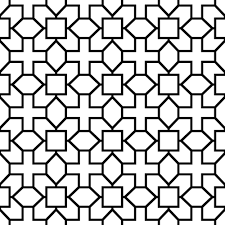

In [150]:
image_path = "/content/drive/MyDrive/images/2.png"
image = cv2.imread(image_path)
#print("type image")
#print(type(image)) #<class 'numpy.ndarray'>
mostrar_imagen(image)

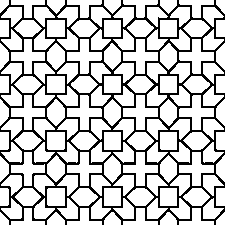

In [151]:
# DILTACION PARA EL ELEMENTO ESTRUCTURANTE CRUZ 3X3
imagenDilatadaCruz = DilatacionCruz(image_path)
mostrar_imagen(imagenDilatadaCruz)

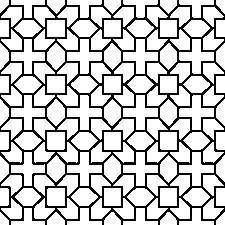

In [152]:
# DILTACION PARA EL ELEMENTO ESTRUCTURANTE DIAMANTE 5X5
imagenDilatadaDiamante5 = DilatacionDiamante5(image_path)
mostrar_imagen(imagenDilatadaDiamante5)

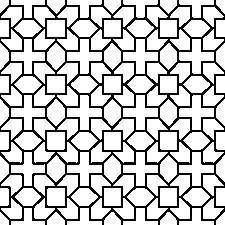

In [153]:
# DILTACION PARA EL ELEMENTO ESTRUCTURANTE DIAMANTE 7X7
imagenDilatadaDiamante7x7 = DilatacionDiamante7(image_path)
mostrar_imagen(imagenDilatadaDiamante7x7)


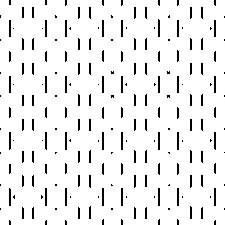

In [154]:
# DILTACION PARA EL ELEMENTO ESTRUCTURANTE DIAMANTE LINEA VERTICAL
imagenDilatadaVerticalLine = DilatacionLineaVertical(image_path)
mostrar_imagen(imagenDilatadaVerticalLine)

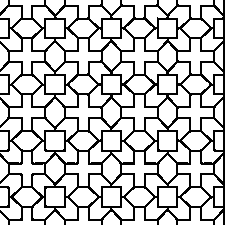

In [155]:
# DILTACION PARA EL ELEMENTO ESTRUCTURANTE LINEA HORIZONTAL
ImagenDilatadaLineaHorizontal = DilatacionLineaHorizontal(image_path)
mostrar_imagen(ImagenDilatadaLineaHorizontal)


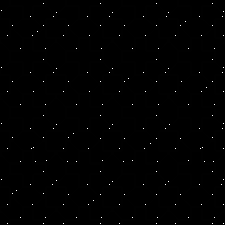

In [156]:
# EROSION PARA EL ELEMENTO ESTRUCTURANTE CRUZ 3X3
ImageErosionCruz = ErosionCruz(image_path)
mostrar_imagen(ImageErosionCruz)

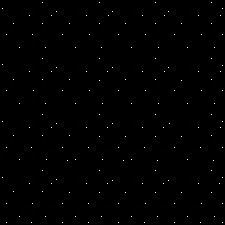

In [157]:
# EROSION PARA EL ELEMENTO ESTRUCTURANTE DIAMANTE 5X5
ImageErosionDiamante5 = ErosionDiamante5(image_path)
mostrar_imagen(ImageErosionDiamante5)

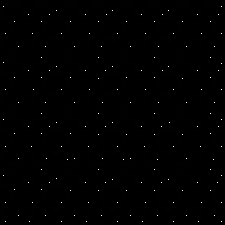

In [158]:
# EROSION PARA EL ELEMENTO ESTRUCTURANTE DIAMANTE 7X7
ImageErosionDiamante7 = ErosionDiamante7(image_path)
mostrar_imagen(ImageErosionDiamante7)

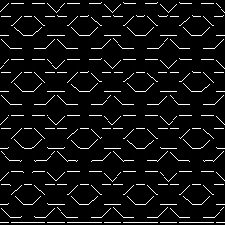

In [159]:
# EROSION PARA EL ELEMENTO ESTRUCTURANTE LINEA VERTICAL
erosionLineaVertical = ErosionLineaVertical(image_path)
mostrar_imagen(erosionLineaVertical)

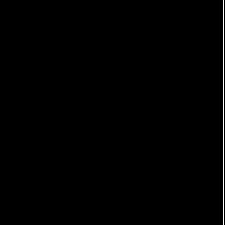

In [160]:
# EROSION PARA EL ELEMENTO ESTRUCTURANTE LINEA HORIZONTAL
erosionLineaHorizontal = ErosionLineaHorizontal(image_path)
mostrar_imagen(erosionLineaHorizontal)